# Atividade de Regressão Linear Múltipla

Prever o preço de um carro.

Fonte: [https://www.kaggle.com/mayankpatel14/second-hand-used-cars-data-set-linear-regression](https://www.kaggle.com/mayankpatel14/second-hand-used-cars-data-set-linear-regression)

# Dados

Informações sobre o carro.


In [1]:
import pandas as pd 

dados = pd.read_csv("https://raw.githubusercontent.com/albathalita/regressao_linear_multipla/main/train.csv")

dados.head()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5


In [2]:
#para saber informações estatísticas

dados.describe()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000,1000.00000
mean,500.500000,601648.286000,799131.3970,4.561000,100274.430000,2.988000,5.592000,11.625000,166.89300,84.54600,103.423000,308520.24250
std,288.819436,58407.246204,57028.9502,1.719079,29150.463233,1.402791,2.824449,2.230549,19.28838,20.51694,21.058716,126073.25915
min,1.000000,500265.000000,700018.0000,2.000000,50324.000000,1.000000,1.000000,8.000000,135.00000,50.00000,68.000000,28226.50000
25%,250.750000,548860.500000,750997.7500,3.000000,74367.500000,2.000000,3.000000,10.000000,150.00000,67.00000,85.000000,206871.75000
50%,500.500000,601568.000000,798168.0000,5.000000,100139.500000,3.000000,6.000000,12.000000,166.00000,84.00000,104.000000,306717.75000
75%,750.250000,652267.250000,847563.2500,6.000000,125048.000000,4.000000,8.000000,13.000000,184.00000,102.00000,121.000000,414260.87500
max,1000.000000,699859.000000,899797.0000,7.000000,149902.000000,5.000000,10.000000,15.000000,200.00000,120.00000,140.000000,584267.50000


In [3]:
x = dados.iloc[:,[1,2,3,4,5,6,7,8,9,10]].values  # colunas independente (entrada)
y = dados.iloc[:,11].values  # coluna dependente (saída)


In [4]:
x_train = x[0:25]  # dados para treinamento
x_test = x[25:]  #dados para testar

In [5]:
y_train = y[0:25]  # dados para treinamento
y_test = y[25:]  #dados para testar

## Análise de correlação

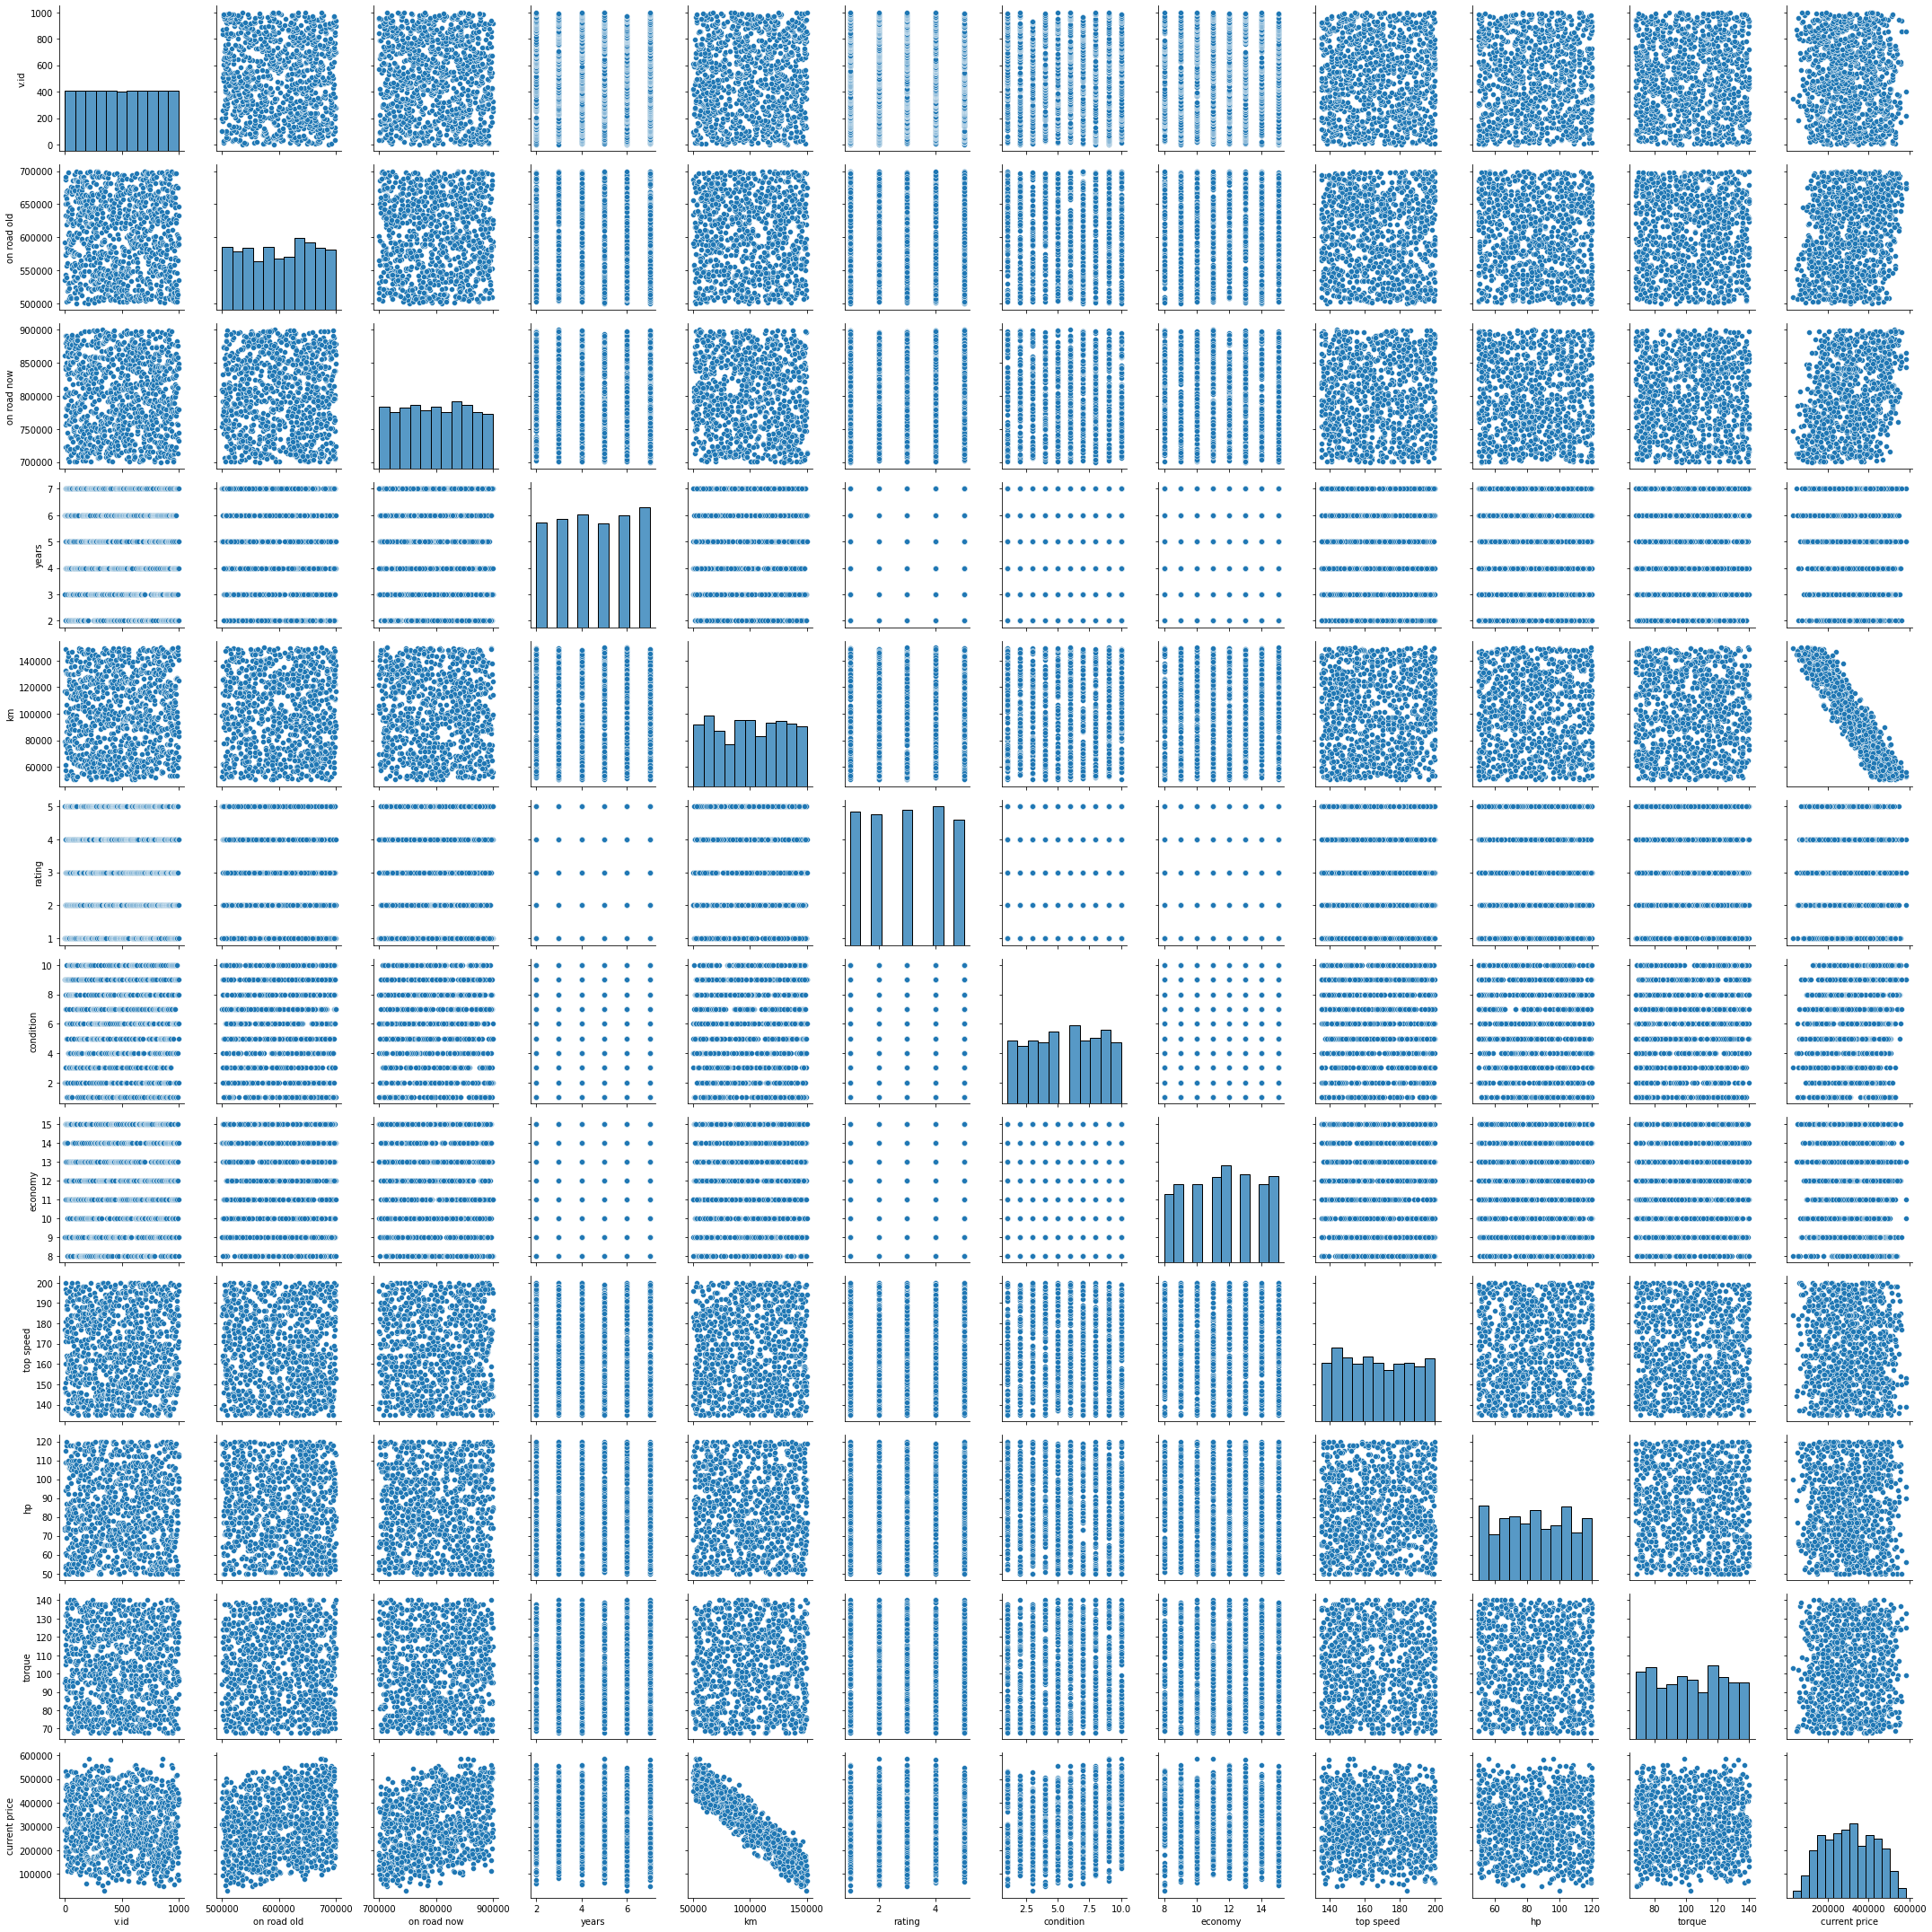

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(dados)
plt.tight_layout()

In [7]:
dados.corr()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
v.id,1.000000,-0.029926,-0.030787,-0.034255,0.047400,-0.018263,-0.038548,0.047137,0.001613,-0.006997,-0.000632,-0.059460
on road old,-0.029926,1.000000,0.034113,0.007207,0.007488,-0.050717,-0.015682,-0.030097,-0.023816,-0.049266,0.008950,0.233035
on road now,-0.030787,0.034113,1.000000,0.004609,-0.053202,0.028280,-0.005043,-0.015880,0.012699,-0.012719,0.017955,0.282793
years,-0.034255,0.007207,0.004609,1.000000,-0.002089,0.027285,0.053579,0.050220,0.025148,-0.003272,0.028859,-0.011854
km,0.047400,0.007488,-0.053202,-0.002089,1.000000,-0.039930,-0.013640,0.032680,0.026450,-0.052918,0.013566,-0.935924
rating,-0.018263,-0.050717,0.028280,0.027285,-0.039930,1.000000,0.015943,-0.009757,-0.042222,-0.022623,0.004408,0.035038
condition,-0.038548,-0.015682,-0.005043,0.053579,-0.013640,0.015943,1.000000,0.058788,0.018472,-0.071552,0.047805,0.110108
economy,0.047137,-0.030097,-0.015880,0.050220,0.032680,-0.009757,0.058788,1.000000,-0.059402,-0.016782,0.041632,-0.034711
top speed,0.001613,-0.023816,0.012699,0.025148,0.026450,-0.042222,0.018472,-0.059402,1.000000,0.057827,-0.019697,-0.027993
hp,-0.006997,-0.049266,-0.012719,-0.003272,-0.052918,-0.022623,-0.071552,-0.016782,0.057827,1.000000,-0.013817,0.030238


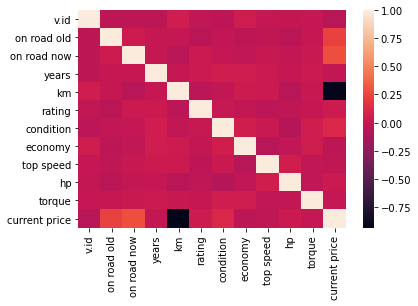

In [8]:
# Mapa de calor

sns.heatmap(dados.corr())

## Ajuste

In [9]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

regr = linear_model.LinearRegression()

In [10]:
regr.fit(x_train,y_train)

y_pred = regr.predict(x_test)

# Erro quadratico médio da saída
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

Mean squared error: 86777579.60


In [12]:
# Qualidade do mapeamento (Ideia do quão bem se encaixa nos dados)

print('Variance score: %.2f' % r2_score(y_test,y_pred))

Variance score: 0.99


In [13]:
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [ 5.31192815e-01  5.10188429e-01 -1.13495637e+03 -4.03708736e+00
  1.99899643e+02  4.00310920e+03  2.18109271e+02 -2.87940411e+01
  3.19201839e+00  7.08490725e+01]
